In [34]:
#para mostrar imagens aqui no jupyter notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

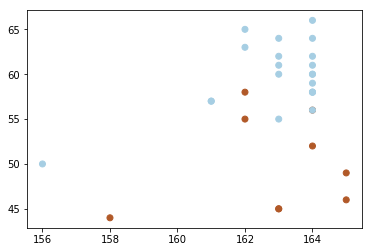

In [191]:
# Resultado impar em somas de dois numeros


#            ALTURA e PESO
X = np.array([[ 156, 50 ],
              [ 158, 44 ],
              [ 161, 57 ],
              [ 161, 57 ],
              [ 162, 55 ],
              [ 162, 58 ],
              [ 162, 63 ],
              [ 162, 65 ],
              [ 163, 45 ],
              [ 163, 45 ],
              [ 163, 55 ],
              [ 163, 60 ],
              [ 163, 61 ],
              [ 163, 62 ],
              [ 163, 64 ],
              [ 164, 52 ],
              [ 164, 56 ],
              [ 164, 56 ],
              [ 164, 58 ],
              [ 164, 58 ],
              [ 164, 58 ],
              [ 164, 59 ],
              [ 164, 60 ],
              [ 164, 60 ],
              [ 164, 61 ],
              [ 164, 62 ],
              [ 164, 64 ],
              [ 164, 66 ],
              [ 165, 46 ],
              [ 165, 49 ]])

# Faz Exporte ?
y = [0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1]

plt.scatter(X[:,0],X[:,1], c=y)
plt.show()


In [193]:
clf = svm.SVC(kernel='linear', C = 1.0)

In [194]:
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [195]:
print(clf.predict([[4,1]]))
print(clf.predict([[4,5]]))

[0]
[0]


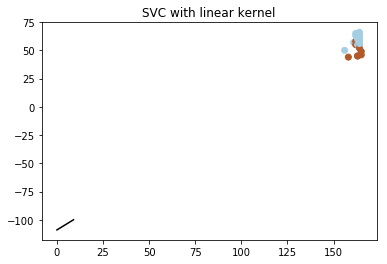

In [196]:
plt.subplot(1, 1, 1)

plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('SVC with linear kernel')

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0,9)
yy = a * xx - clf.intercept_[0] / w[1]
h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.show()

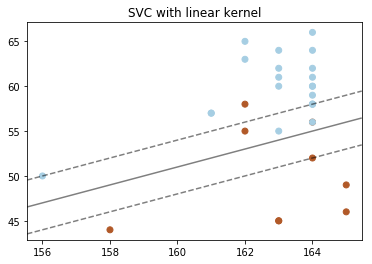

In [197]:
clf2 = svm.SVC(kernel='rbf', C = 1.0)
clf2.fit(X,y)

# create a mesh to plot in
h=0.2
x_min, x_max = X[:,0].min()-1, X[:,0].max()+2
y_min, y_max = X[:,1].min()-1, X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

##Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.reshape(xx.shape)

#plt.contourf(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#           linestyles=['--', '-', '--'])


plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('SVC with linear kernel')


# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')

plt.show()